By Christopher J. Cavanaugh

In [46]:
import pandas as pd
import numpy as np
import ffn
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
filename = 'Chris Cavanaugh - 2019 Analyst IPO Data Exercise copy.xlsx'
PitchDataGiven = pd.read_excel(filename, sheet_name = 2, index_col =6, 
                               skiprows = 4, parse_dates = True)
#list(PitchDataGiven)
PitchDataGiven.head()

,Company ID,Company Name,Company Description,Deal ID,Deal #,Announce Date,Deal Status,"Capital Raised (millions, USD)","Post-money Valuation (millions, USD)",Opening Price Per Share,...,Deal Type 2,Deal Type 3,Industry Sector,Industry Group,Industry Code,Industry Vertical(s),City,State,Zip,Country
Close Date,,,,,,,,,,,,,,,,,,,,,
2017-07-10,183920-14,@-Health,Provider of health diagnostic services. The co...,91712-08T,1,2017-06-07 00:00:00,Completed,NaN,34.95,6.91,...,NaN,NaN,Healthcare,Healthcare Devices and Supplies,Monitoring Equipment,NaN,-,NaN,NaN,France
2018-09-12,97579-45,111 Group,111 Inc is a Chinese online retail pharmacies....,110467-45T,7,2018-08-15 00:00:00,Completed,100.450,626.28,14.00,...,NaN,NaN,Consumer Products and Services (B2C),Retail,Internet Retail,NaN,Shanghai,NaN,201203,China
2018-07-11,125878-69,12 Retech,12 Retech Corp mainly engages in the creation ...,110745-37T,1,NaN,Completed,NaN,NaN,NaN,...,NaN,NaN,Information Technology,Software,Application Software,Mobile,Scottsdale,Arizona,85251,United States
2014-07-16,65491-66,1347 Capital,1347 Capital is a wholly owned subsidiary of K...,71758-09T,1,2014-05-05 00:00:00,Completed,40.000,41.80,10.00,...,NaN,NaN,Financial Services,Capital Markets/Institutions,Other Capital Markets/Institutions,NaN,Itasca,Illinois,60143,United States
NaT,127757-44,17 Media,Developer of a photo-sharing and live video-st...,105824-62T,8,43231,Failed/Cancelled,60.088,267.56,8.00,...,NaN,NaN,Information Technology,Software,Application Software,Mobile,Taipei,NaN,NaN,Taiwan


In [7]:
newPitchGiven = PitchDataGiven[['Company Name', 'Deal Status',
                                'Capital Raised (millions, USD)',
                               'Post-money Valuation (millions, USD)', 
                                'Opening Price Per Share',
                               'Filing Range', 'Industry Sector', 'Industry Group',
                                'Industry Code',
                               'Industry Vertical(s)','Country']].copy()
#set Completed Date as index
newPitchGiven.set_index(PitchDataGiven.index)
#drop all IPOs that are not completed
newPitchGiven = newPitchGiven[newPitchGiven['Deal Status'] == 'Completed']
SectorList = list(newPitchGiven['Industry Sector'].unique())
#SectorList
list(newPitchGiven)

['Company Name',
 'Deal Status',
 'Capital Raised (millions, USD)',
 'Post-money Valuation (millions, USD)',
 'Opening Price Per Share',
 'Filing Range',
 'Industry Sector',
 'Industry Group',
 'Industry Code',
 'Industry Vertical(s)',
 'Country']

In [8]:
#data.groupby(data.date.dt.year)
#newPitchGiven.groupby([newPitchGiven.index.year, 'Country']).sum()
industrySector = 'Industry Sector'
USA = 'United States'
china = 'China'
country = 'Country'
capitalRaised = 'Capital Raised (millions, USD)'
postMoneyVal = 'Post-money Valuation (millions, USD)'
companyName = 'Company Name'
#Total Capital Raised each year
def sumYearFilter0(df):
    newDF = df.groupby([df.index.year]).sum()
    newDF = newDF[[capitalRaised]]
    return newDF
#Total Capital Raised each year grouped by one
def sumYearFilter1(df, filter1):
    newDF = df.groupby([df.index.year, filter1]).sum()
    newDF = newDF[[capitalRaised]]
    return newDF
#Total Capital Raised each year grouped by two
def sumYearFilter2(df, filter1, filter2):
    newDF = df.groupby([df.index.year, filter1, filter2]).sum()
    newDF = newDF[[capitalRaised]]
    return newDF
#Take above, filter by one
def levelVals(df, colName, val):
    newDF = df.iloc[df.index.get_level_values(colName) == val]
    return newDF
#Take above, filter by two
def levelVals2(df, colName1, val1, colName2, val2):
    newDF1 = df.iloc[df.index.get_level_values(colName1) == val1]
    newDF2 = newDF1.iloc[newDF1.index.get_level_values(colName2) == val2]
    return newDF2
def levelVals3(df, colName1, val1, val3, colName2, val2):
    tup = (val1, val3)
    newDF1 = df.iloc[df.index.get_level_values(colName1) == [val1, val3]]
    newDF2 = newDF1.iloc[newDF1.index.get_level_values(colName2) == val2]
    return newDF2
#Top IPOs, use newPitchGiven as df
def topHeadVal(df, headVal):
    newDF = df.sort_values(by=[postMoneyVal], ascending = False).head(headVal)
    return newDF.set_index([companyName])
#Top IPOs grouped by one, use newPitchGiven as df
def topHeadVal1(df, sortCriteria1, headVal):
    newDF = df.sort_values(by=[postMoneyVal, sortCriteria1], ascending = False).groupby([sortCriteria1]).head(headVal)
    return newDF.set_index([sortCriteria1, companyName])
#Capital Raised grouped by Market Cap
def capFilter1(df):
    bins = [0, 2000, 10000, np.inf]
    labels = ['Small Cap', 'Mid-Cap', 'Large']
    df['Cap Range'] = pd.cut(df[postMoneyVal], bins = bins,
                            labels = labels)
    capRaisedbySize = df.groupby('Cap Range').sum()
    denom = capRaisedbySize[capitalRaised].sum()
    capRaisedbySize['Portion of all Capital Raised'] = capRaisedbySize[capitalRaised].apply(
        lambda x: (x/denom)*100)
    return capRaisedbySize.drop(['Opening Price Per Share'], axis=1)
#Capital Raised grouped by Market Cap plus one
def capFilter2(df, filter1):
    bins = [0, 2000, 10000, np.inf]
    labels = ['Small Cap', 'Mid-Cap', 'Large']
    df['Cap Range'] = pd.cut(df[postMoneyVal], bins = bins,
                            labels = labels)
    capRaisedbySize = df.groupby(['Cap Range', filter1]).sum()
    denom = capRaisedbySize[capitalRaised].sum()
    capRaisedbySize['Portion of all Capital Raised'] = capRaisedbySize[capitalRaised].apply(
        lambda x: (x/denom)*100)
    return capRaisedbySize.drop(['Opening Price Per Share'], axis=1)
#Capital Raised grouped by Market Cap plus two
def capFilter3(df, filter1, filter2):
    bins = [0, 2000, 10000, np.inf]
    labels = ['Small Cap', 'Mid-Cap', 'Large']
    df['Cap Range'] = pd.cut(df[postMoneyVal], bins = bins,
                            labels = labels)
    capRaisedbySize = df.groupby(['Cap Range', filter1, filter2]).sum()
    denom = capRaisedbySize[capitalRaised].sum()
    capRaisedbySize['Portion of all Capital Raised'] = capRaisedbySize[capitalRaised].apply(
        lambda x: (x/denom)*100)
    return capRaisedbySize.drop(['Opening Price Per Share'], axis=1).dropna(axis = 0,
                                                                            how = 'all')
#Merge and Rename function
def mergeRename(chinaDF, USAdf):
    newDF = chinaDF.merge(USAdf, on = 'Close Date')
    newDF2 = newDF.rename({'Capital Raised (millions, USD)_x': 'Capital Raised (millions, USD) in China', 
                  'Capital Raised (millions, USD)_y': 'Capital Raised (millions, USD) in USA'}, axis='columns')
    return newDF2

# Total Capital Raised each Year Globally
totalCapRaisedWW = sumYearFilter0(newPitchGiven)
CountryCapRaise = sumYearFilter1(newPitchGiven, country)
SectorCapRaise = sumYearFilter1(newPitchGiven, industrySector)
IndGroupCapRaise = sumYearFilter1(newPitchGiven, 'Industry Group')
IndCodeCapRaise = sumYearFilter1(newPitchGiven, 'Industry Code')
CountrySectorCapRaise = sumYearFilter2(newPitchGiven, country, industrySector)

healthCapRaise = levelVals(SectorCapRaise, industrySector, SectorList[0])
B2CCapRaise = levelVals(SectorCapRaise, industrySector, SectorList[1])
ITCapRaise = levelVals(SectorCapRaise, industrySector, SectorList[2])
FinCapRaise = levelVals(SectorCapRaise, industrySector, SectorList[3])
B2BCapRaise = levelVals(SectorCapRaise, industrySector, SectorList[4])
EnergyCapRaise = levelVals(SectorCapRaise, industrySector, SectorList[5])
MatCapRaise = levelVals(SectorCapRaise, industrySector, SectorList[6])

healthCapRaiseUSA = levelVals2(CountrySectorCapRaise, country, USA, industrySector, SectorList[0])
B2CCapRaiseUSA = levelVals2(CountrySectorCapRaise, country, USA, industrySector, SectorList[1])
ITCapRaiseUSA = levelVals2(CountrySectorCapRaise, country, USA, industrySector, SectorList[2])
FinCapRaiseUSA = levelVals2(CountrySectorCapRaise, country, USA, industrySector, SectorList[3])
B2BCapRaiseUSA = levelVals2(CountrySectorCapRaise, country, USA, industrySector, SectorList[4])
EnergyCapRaiseUSA = levelVals2(CountrySectorCapRaise, country, USA, industrySector, SectorList[5])
MatCapRaiseUSA = levelVals2(CountrySectorCapRaise, country, USA, industrySector, SectorList[6])

healthCapRaiseChi = levelVals2(CountrySectorCapRaise, country, china, industrySector, SectorList[0])
B2CCapRaiseChi = levelVals2(CountrySectorCapRaise, country, china, industrySector, SectorList[1])
ITCapRaiseChi = levelVals2(CountrySectorCapRaise, country, china, industrySector, SectorList[2])
FinCapRaiseChi = levelVals2(CountrySectorCapRaise, country, china, industrySector, SectorList[3])
B2BCapRaiseChi = levelVals2(CountrySectorCapRaise, country, china, industrySector, SectorList[4])
EnergyCapRaiseChi = levelVals2(CountrySectorCapRaise, country, china, industrySector, SectorList[5])
MatCapRaiseChi = levelVals2(CountrySectorCapRaise, country, china, industrySector, SectorList[6])

healthCapRaiseChiUSA = mergeRename(healthCapRaiseChi, healthCapRaiseUSA)
B2CCapRaiseChiUSA = mergeRename(B2CCapRaiseChi, B2CCapRaiseUSA)
ITCapRaiseChiUSA = mergeRename(ITCapRaiseChi, ITCapRaiseUSA)
finCapRaiseChiUSA = mergeRename(FinCapRaiseChi, FinCapRaiseUSA)
B2BCapRaiseChiUSA = mergeRename(B2BCapRaiseChi, B2BCapRaiseUSA)
energyCapRaiseChiUSA = mergeRename(EnergyCapRaiseChi, EnergyCapRaiseUSA)
matCapRaiseChiUSA = mergeRename(MatCapRaiseChi, MatCapRaiseUSA)

top25allTime = topHeadVal(newPitchGiven, 25)
top10 = topHeadVal1(newPitchGiven, country, 10)
top10USA = top10.iloc[top10.index.get_level_values(country) == USA]
top10Chi = top10.iloc[top10.index.get_level_values(country) == china]

justMarketCap = capFilter1(newPitchGiven)
markCapSector = capFilter2(newPitchGiven, industrySector)
markCapHealth = levelVals(markCapSector, industrySector, SectorList[0])
markCapB2C = levelVals(markCapSector, industrySector, SectorList[1])
markCapIT = levelVals(markCapSector, industrySector, SectorList[2])
markCapFin = levelVals(markCapSector, industrySector, SectorList[3])
markCapB2B = levelVals(markCapSector, industrySector, SectorList[4])
markCapEnergy = levelVals(markCapSector, industrySector, SectorList[5])
markCapMat = levelVals(markCapSector, industrySector, SectorList[6])
totalCapRaisedWW = totalCapRaisedWW.loc[2013:2018]
#CountrySectorCapRaise

How much capital has been raised in IPOs (2013-2018) globally in each sector?

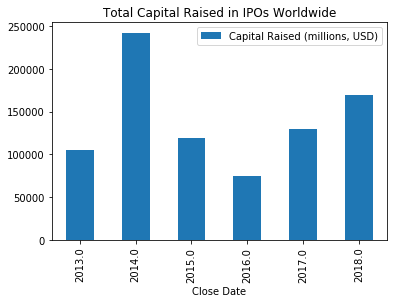

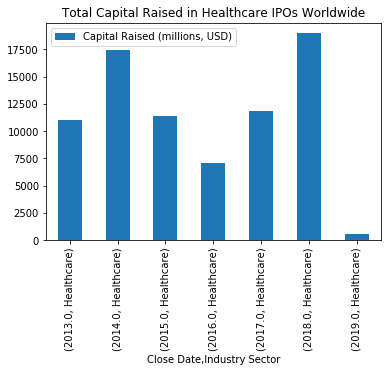

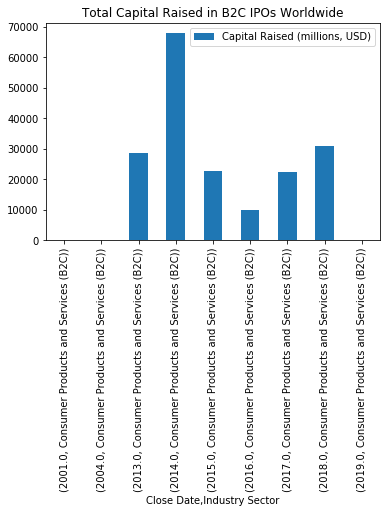

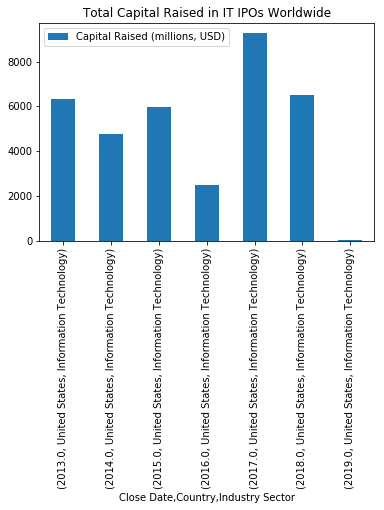

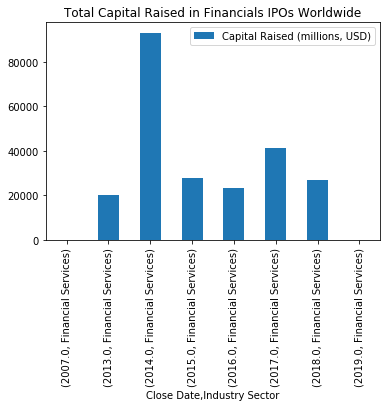

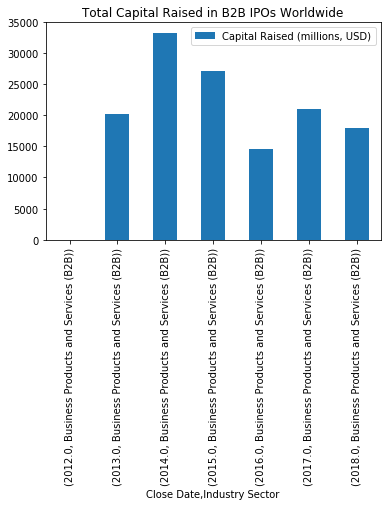

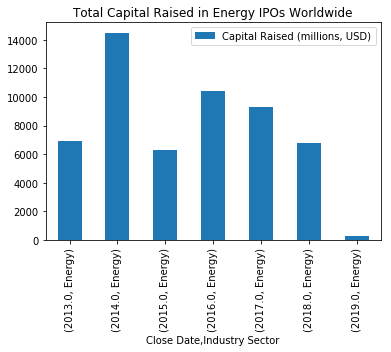

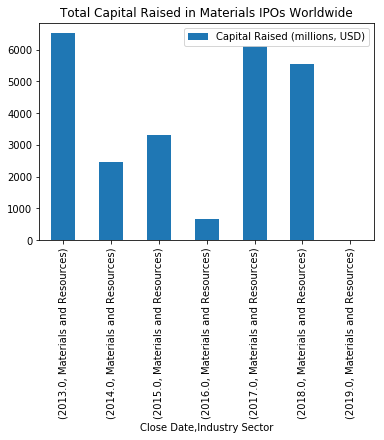

In [10]:
#show
totalCapRaisedWW.plot.bar(title = 'Total Capital Raised in IPOs Worldwide')
plt.savefig('Total Capital Raised in IPOs Worldwide.png')
#show
healthCapRaise.plot.bar(title = 'Total Capital Raised in Healthcare IPOs Worldwide')
B2CCapRaise.plot.bar(title = 'Total Capital Raised in B2C IPOs Worldwide')
#show IT
ITCapRaiseUSA.plot.bar(title = 'Total Capital Raised in IT IPOs Worldwide')
FinCapRaise.plot.bar(title = 'Total Capital Raised in Financials IPOs Worldwide')
B2BCapRaise.plot.bar(title = 'Total Capital Raised in B2B IPOs Worldwide')
EnergyCapRaise.plot.bar(title = 'Total Capital Raised in Energy IPOs Worldwide')
#show Mat
MatCapRaise.plot.bar(title = 'Total Capital Raised in Materials IPOs Worldwide')

How much capital has been raised in IPOs (2013-2018) in the US and China in each sector?

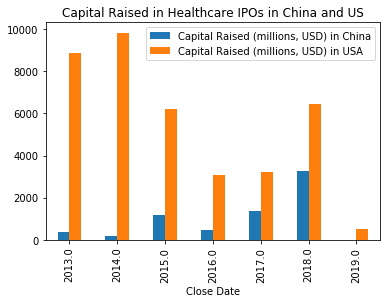

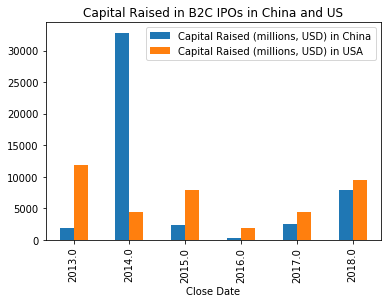

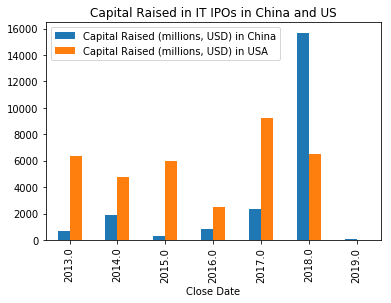

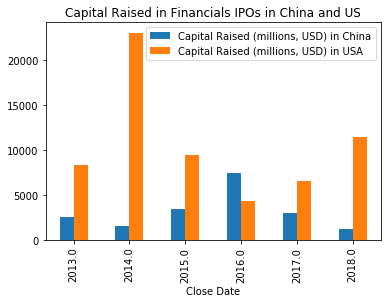

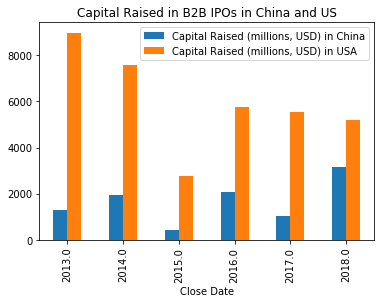

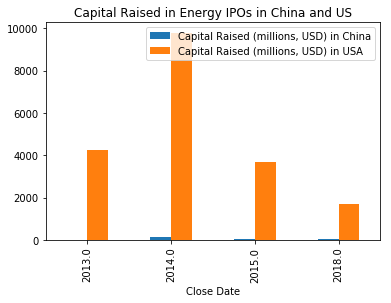

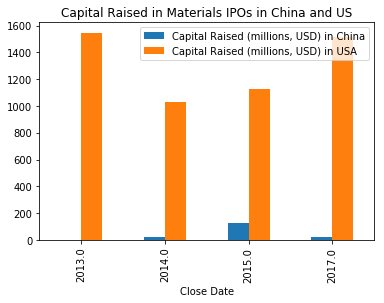

In [11]:
#show
healthCapRaiseChiUSA.plot.bar(title = 'Capital Raised in Healthcare IPOs in China and US')
plt.savefig('Capital Raised in Healthcare IPOs in China and US.png')
#show
B2CCapRaiseChiUSA.plot.bar(title = 'Capital Raised in B2C IPOs in China and US')
plt.savefig('Capital Raised in B2C IPOs in China and US.png')
#show
ITCapRaiseChiUSA.plot.bar(title='Capital Raised in IT IPOs in China and US')
plt.savefig('Capital Raised in IT IPOs in China and US.png')
finCapRaiseChiUSA.plot.bar(title = 'Capital Raised in Financials IPOs in China and US')
plt.savefig('Capital Raised in Financials IPOs in China and US.png')
B2BCapRaiseChiUSA.plot.bar(title='Capital Raised in B2B IPOs in China and US')
plt.savefig('Capital Raised in B2B IPOs in China and US.png')
energyCapRaiseChiUSA.plot.bar(title = 'Capital Raised in Energy IPOs in China and US')
plt.savefig('Capital Raised in Energy IPOs in China and US.png')
matCapRaiseChiUSA.plot.bar(title = 'Capital Raised in Materials IPOs in China and US')
plt.savefig('Capital Raised in Materials IPOs in China and US.png')

What are the largest IPOs globally (by post-money valuation, 2013-2018)?

In [12]:
top25allTimeEdited = top25allTime[['Capital Raised (millions, USD)',
                                   'Post-money Valuation (millions, USD)', 
                                   'Industry Sector', 'Country']].copy()
top25allTimeEdited.set_index(top25allTime.index)
top25allTimeEdited
top10Edited1 = topHeadVal(newPitchGiven, 10)
top10Edited2 = top10Edited1[['Capital Raised (millions, USD)',
                                   'Post-money Valuation (millions, USD)', 
                                   'Industry Sector', 'Country']].copy()
top10Edited2

,"Capital Raised (millions, USD)","Post-money Valuation (millions, USD)",Industry Sector,Country
Company Name,,,,
Alibaba Group,25032.30,167620.0,Consumer Products and Services (B2C),China
Meituan-Dianping,4200.00,52800.0,Information Technology,China
Telesites,NaN,51494.6,Information Technology,Mexico
Postal Savings Bank of China,7429.44,49529.6,Financial Services,China
Xiaomi Technology,4721.43,48471.3,Consumer Products and Services (B2C),China
China Tower,6900.00,35000.0,Information Technology,China
Siemens Healthineers,5177.35,34515.7,Healthcare,Germany
Spotify,9245.00,29548.9,Information Technology,Sweden
Dalian Wanda Group,3713.86,27697.9,Consumer Products and Services (B2C),China


What are the largest IPOs in the US (by post-money valuation, 2013-2018)?

In [13]:
top10USAedited = top10USA[['Capital Raised (millions, USD)',
                                   'Post-money Valuation (millions, USD)', 
                                   'Industry Sector']].copy()
top10USAedited.set_index(top10USA.index)
top10USAedited

Capital Raised (millions, USD)  \
Country       Company Name                                          
United States Altice USA                                 1918.290   
              Baxalta                                     112.612   
              Hilton Worldwide                           2352.810   
              Snap                                       3400.000   
              Synchrony Financial                        2875.000   
              First Data                                 2600.000   
              Twitter                                    1820.000   
              Plains Gp Holdings                         2816.000   
              Zoetis                                     2238.600   
              Citizens Bank                              3010.000   

                                   Post-money Valuation (millions, USD)  \
Country       Company Name                                                
United States Altice USA                                        22112.1   
              Baxalta                                           21781.5   
              Hilton Worldwide                                  19692.3   
              Snap                                              19672.6   
              Synchrony Financial                               19096.2   
              First Data                                        14700.0   
              Twitter                                           14162.1   
              Plains Gp Holdings                                13332.7   
              Zoetis                                            13000.0   
              Citizens Bank                                     12040.0   

                                                        Industry Sector  
Country       Company Name                                               
United States Altice USA                         Information Technology  
              Baxalta                                        Healthcare  
              Hilton Worldwide     Consumer Products and Services (B2C)  
              Snap                               Information Technology  
              Synchrony Financial                    Financial Services  
              First Data                         Information Technology  
              Twitter                            Information Technology  
              Plains Gp Holdings   Business Products and Services (B2B)  
              Zoetis                                         Healthcare  
              Citizens Bank                          Financial Services

What are the largest IPOs in China (by post-money valuation, 2013-2018)?

In [14]:
top10Chi
top10ChiEdited = top10Chi[['Capital Raised (millions, USD)',
                                   'Post-money Valuation (millions, USD)', 
                                   'Industry Sector']].copy()
top10ChiEdited.set_index(top10Chi.index)
top10ChiEdited

Capital Raised (millions, USD)  \
Country Company Name                                                        
China   Alibaba Group                                            25032.30   
        Meituan-Dianping                                          4200.00   
        Postal Savings Bank of China                              7429.44   
        Xiaomi Technology                                         4721.43   
        China Tower                                               6900.00   
        Dalian Wanda Group                                        3713.86   
        JD.com                                                    1780.03   
        Tencent Music Entertainment Group                         1066.00   
        Pinduoduo                                                 1626.40   
        ZTO Express (Cayman)                                      1405.95   

                                           Post-money Valuation (millions, USD)  \
Country Company Name                                                              
China   Alibaba Group                                                  167620.0   
        Meituan-Dianping                                                52800.0   
        Postal Savings Bank of China                                    49529.6   
        Xiaomi Technology                                               48471.3   
        China Tower                                                     35000.0   
        Dalian Wanda Group                                              27697.9   
        JD.com                                                          25974.6   
        Tencent Music Entertainment Group                               21258.6   
        Pinduoduo                                                       21047.9   
        ZTO Express (Cayman)                                            14262.4   

                                                                Industry Sector  
Country Company Name                                                             
China   Alibaba Group                      Consumer Products and Services (B2C)  
        Meituan-Dianping                                 Information Technology  
        Postal Savings Bank of China                         Financial Services  
        Xiaomi Technology                  Consumer Products and Services (B2C)  
        China Tower                                      Information Technology  
        Dalian Wanda Group                 Consumer Products and Services (B2C)  
        JD.com                             Consumer Products and Services (B2C)  
        Tencent Music Entertainment Group                Information Technology  
        Pinduoduo                          Consumer Products and Services (B2C)  
        ZTO Express (Cayman)               Business Products and Services (B2B)

As a portion of total capital raise, how much capital have large-, mid- and small-cap IPOs (grouped by post-money valuation) raised globally?

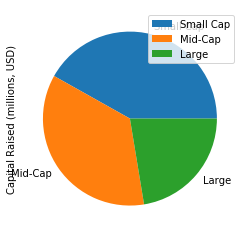

In [15]:
#show
justMarketCap.plot.pie(y = 'Capital Raised (millions, USD)')
plt.savefig('Capital Raised (millions, USD).png')
#justMarketCap

As a portion of total capital raise, how much capital have large-, mid- and small-cap IPOs (grouped by post-money valuation) raised globally, grouped by sector?

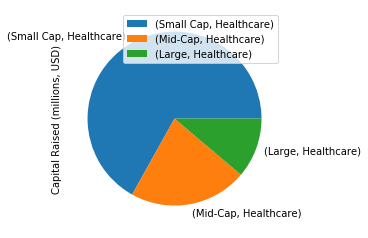

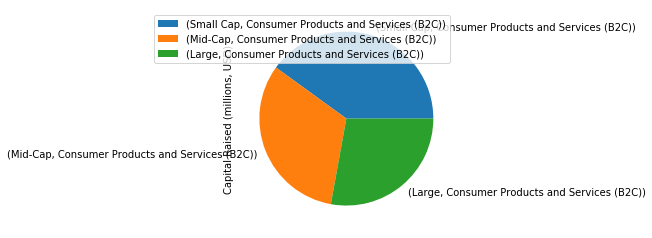

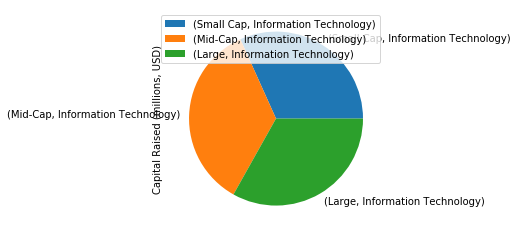

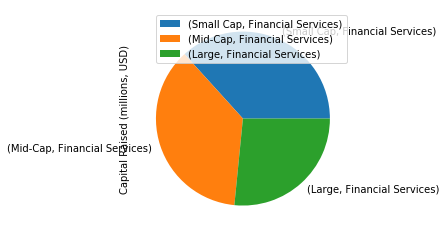

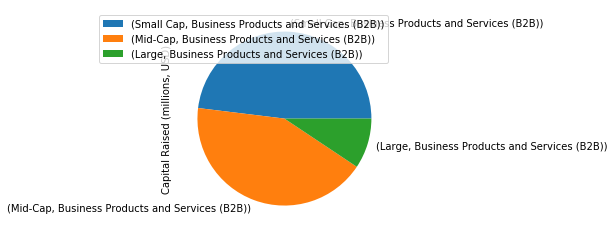

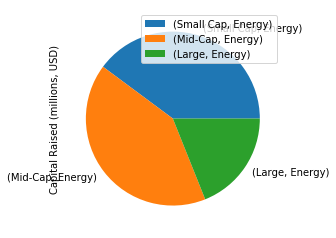

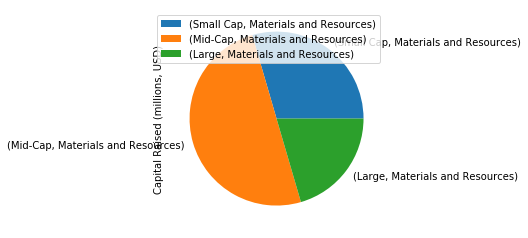

In [16]:
#show
markCapHealth.plot.pie(y = 'Capital Raised (millions, USD)')
plt.savefig('Healthcare Capital Raised (millions, USD).png')
markCapB2C.plot.pie(y = 'Capital Raised (millions, USD)')
#show
markCapIT.plot.pie(y = 'Capital Raised (millions, USD)')
markCapFin.plot.pie(y = 'Capital Raised (millions, USD)')
#show
markCapB2B.plot.pie(y = 'Capital Raised (millions, USD)')
plt.savefig('B2B Capital Raised (millions, USD).png')
markCapEnergy.plot.pie(y = 'Capital Raised (millions, USD)')
#show
markCapMat.plot.pie(y = 'Capital Raised (millions, USD)')
plt.savefig('Materials Capital Raised (millions, USD).png')

Of the companies with the largest 42 US IPOs since 2013, which performed the best in their first quarter (63 trading days)?

In [251]:
allIPOsbyCountry = topHeadVal1(newPitchGiven, country, 50)
AmericanIPOs = allIPOsbyCountry.iloc[allIPOsbyCountry.index.get_level_values(country) == USA]
AmericanIPOs
US50NamesTickers = {'Altice USA': 'atus', 'Hilton Worldwide': 'hlt', 'Snap': 'snap', 'Synchrony Financial':'syf',
              'First Data': 'fdc', 'Twitter': 'twtr', 'Plains Gp Holdings': 'pagp', 'Zoetis':'zts', 
               'Ally Financial': 'ally', 'Antero Resources': 'ar', 'AXA Equitable Holdings':'eqh',
              'ADT Security Services': 'adt', 'Elanco': 'elan', 'Santander Consumer USA': 'sc',
              'Dropbox': 'dbx', 'Moderna Therapeutics': 'mrna', 'Vici Properties': 'vici', 'EQT GP Holdings': 'eqt',
              'Coty': 'coty', 'Invitation Homes': 'invh', 'Paramount Group': 'pgre', 'LendingClub': 'lc',
              'Gates': 'gtes', 'Voya Financial': 'voya', 'US Foods': 'usfd', 'EP Energy Global': 'epe',
              'Aramark': 'armk', 'SolarWinds': 'swi', 'Zayo': 'zayo', 'Graftech International': 'eaf',
              'Brixmor Property Group': 'brx', 'Axalta Coating Systems': 'axta', 'DocuSign': 'docu',
              'Valvoline': 'vvv', 'GreenSky': 'gsky', 'Switch (Nevada)': 'swch', 'Enable Midstream Partners': 'enbl',
              'Sabre': 'sabr', 'Fitbit': 'fit', 'Extended Stay America': 'stay', 'Ares Management': 'ares',
              'TransUnion': 'tru'}
us50tickers = []
for j in US50NamesTickers.values():
    us50tickers.append(j)
us50tickers

PitchDataGiven2 = pd.read_excel(filename, sheet_name = 2, index_col =1, 
                               skiprows = 4, parse_dates = True)

closeDates = pd.DataFrame()
for k in US50NamesTickers:
    closeDates = closeDates.append(PitchDataGiven2.loc[PitchDataGiven2.index == k])

US50NamesTickersDF = pd.DataFrame.from_dict(US50NamesTickers, orient = 'index', columns=['Ticker'])
US50NamesTickersDF.index.name = 'Company Name'
closeDates = closeDates[['Close Date']].copy()
nameTickDate = US50NamesTickersDF.merge(closeDates, on='Company Name')
nameTickDate = nameTickDate.dropna(how = 'any')

tickList = nameTickDate['Ticker'].tolist()

assetData = pd.DataFrame()
for row in range(len(tickList)):
    tickdata = ffn.get(tickList[row])
    assetData = pd.concat([assetData, tickdata], axis = 1)
    
assetRebase = pd.DataFrame()
for colname in list(assetData):
    singleAssetData = assetData.loc[:, colname].dropna()
    singleAssetData1 = pd.DataFrame(singleAssetData[0:63])#, index = np.arange(63))
    singleAssetData1 = singleAssetData1.set_index(np.arange(63))
    singleAssetData1 = singleAssetData1.rebase()
    assetRebase = pd.concat([assetRebase, singleAssetData1], axis = 1)
    
assetRebaseSorted = assetRebase.sort_values(assetRebase.last_valid_index(), axis=1, ascending=False)
assetRebaseSorted.iloc[62]

fit     165.200005
invh    144.444418
docu    139.718095
zayo    135.863634
dbx     125.316008
axta    123.566262
twtr    121.046763
armk    120.944902
pagp    119.636385
voya    118.394931
syf     116.739127
sabr    116.121207
vici    113.513509
enbl    112.432438
mrna    109.838709
swi     109.647371
stay    108.881436
ar      107.863867
zts     107.534357
eqh     107.325464
ares    104.462362
pgre    103.245332
hlt     102.465126
brx     101.417914
epe     101.216810
tru      99.133866
usfd     98.394221
eqt      97.545078
ally     92.537899
vvv      91.946259
sc       90.952385
coty     88.882481
elan     87.888887
snap     86.642155
gtes     85.891894
fdc      85.687500
swch     84.379719
atus     83.613574
lc       81.391376
gsky     77.611296
adt      76.013068
eaf      60.000005
Name: 62, dtype: float64